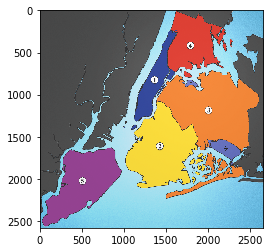

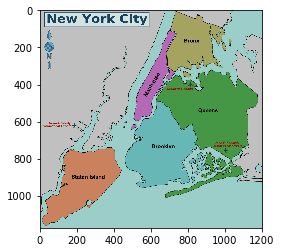

(None,)

In [1]:
## Introduction:

# The Aim of this is to predeict the Pickup address of Ubers,Taxi's in NewYork city to help redistribute and adjust
# the numbers of cars available in each Area. 

## the DataSet contains Time,Date,Lon,Lat and base number
## note that there is 5 base Codes in this DataSets
## One thing i sought to discover was the meaning behind the base codes that accompanied each uber pickup.
## A quick search led to these codes being associated with several of Uber's bases.
## another quick Search led us that NewYork City have 5 Main areas [Queens, Manhattan, Brokklyn, Bronx, State Island]
## led me to the idea that every base code represent a certain Area 
## from this point im going to work with these, using classification models 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('ny1.png')
imgplot = plt.imshow(img)
plt.show(),

img=mpimg.imread('ny2.png')
imgplot = plt.imshow(img)
plt.show(),


## in future im plannining to work with the lon and lat data also.

In [5]:
## Here the needed libraries is being imported
import glob,os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [6]:
#as the dataset im using is multple CSV files, this function combine them in one File, note that every file represent 
# a month, the DataSet contains Time,Date,Lon,Lat and base number.

## for the sake of this report i made a small dataset that includes all the bases and there datas
## so that i can work on it to have an idea what should i expect when i use all the data set 

def combineFile(OutputFileName1):
  outfile = open(OutputFileName1, 'wb')
  outfile.write('count,Date/Time, lat , lon ,base\n')
  for filename in glob.glob('*.csv'):
    if filename == OutputFileName1: # Skip the file we're writing.
      continue
    with open(filename, 'r') as infile:
      lineno = 0 ; c = 0
      for line in infile:
        lineno += 1
        if lineno == 1: # Skip the header line.
          continue
        fields = line.split(',')
        date = fields[0]
        lat = fields[1]
        lon = fields[2]
        base= fields[3]
        counter = c  ## here i added a counter to use later
        c+=1
        # Line = (date,time,address)
        if date != " ":
          outfile.write('%s, %s, %s , %s, %s \n' % (counter,date, lat, lon,base))
  outfile.close()
  return OutputFileName1
# combineFile("output.csv")

In [7]:
## the function below creats a dataframe from the data.

def create_df(data_path):
    df = pd.read_csv(data_path)
    return df


In [8]:


df1 = create_df("output.csv")
df2 = shuffle(df1)
## shows some of the dataset
df2.head(n=10)

,count,Date/Time,lat,lon,base
54414,54414,"""5/2/2014 23:03:00""",40.7312,-74.0014,"""B02598"""
561569,561569,"""5/19/2014 16:49:00""",40.7574,-74.0008,"""B02682"""
484365,484365,"""5/9/2014 12:56:00""",40.7441,-73.9917,"""B02682"""
3564,3564,"""5/3/2014 17:58:00""",40.7707,-73.9642,"""B02512"""
443902,443902,"""5/3/2014 20:55:00""",40.7199,-73.9952,"""B02682"""
294994,294994,"""5/31/2014 20:16:00""",40.7575,-73.9706,"""B02598"""
402123,402123,"""5/28/2014 16:48:00""",40.7331,-73.9813,"""B02617"""
474796,474796,"""5/8/2014 11:35:00""",40.7389,-73.9830,"""B02682"""
464479,464479,"""5/7/2014 7:02:00""",40.7563,-73.9935,"""B02682"""
329909,329909,"""5/9/2014 17:49:00""",40.7668,-73.9818,"""B02617"""


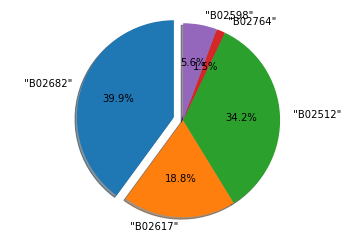

In [55]:


## prepair the data to visaulise it.
temp = df1["base"]
names ={};labels=[];sizes=[];sizes2=[];labels2=[]
names2 =  ["B02512" ,"B02682","B02617","B02598","B02764"]
for i in temp:
    if i not in names :
        names[i]=1
    if i in names:
        names[i]+=1
for j in names:
    sizes.append(names[j])
    labels.append(j)

sizes2 = [sizes[5],sizes[2],sizes[0],sizes[4],sizes[3]]
labels2 = [labels[0],labels[2],labels[3],labels[4],labels[5]]        
## Visaulise the Data as a pie chart 
lode = (0.1, 0, 0, 0,0)  # only "explode" the 2nd slice.
fig1, ax1 = plt.subplots()
ax1.pie(sizes2, explode=lode, labels=labels2, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


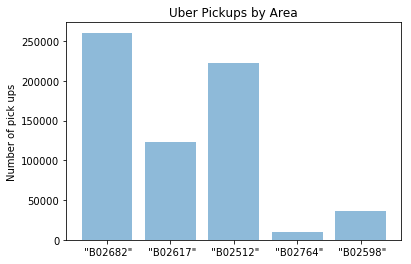

In [40]:
# Visaulizing the Data using Bars



objects = labels2
y_pos = np.arange(len(objects))
performance = sizes2
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of pick ups')
plt.title('Uber Pickups by Area')
 
plt.show()

In [11]:
def nan_columns(df):
    nancolumns = df.columns[df.isnull().any()].tolist()
    return nancolumns

def categorical_columns(df):
    # output: a list of column names that contain categorical values in the data frame
    catcolumns = []
    temp = list(df.columns.values)
    for i in temp:
        # temp2 = pd.core.common.is_categorical_dtype(df[i].dtype)
        if df[i].dtype == object :
            catcolumns.append(df[i].name) # df.dtype works too!! :D
    # print catcolumns
    return catcolumns

def cat_to_num(new_df1, catcolumns):
  lb_make = LabelEncoder()
  new_df1["Code"] = lb_make.fit_transform(new_df1[catcolumns])
  new_df1[[catcolumns, "Code"]].head(11)

  return new_df1

In [12]:
def Main():
  #Main Fn to run all data processing functions
    # data1 = combineFile("output.csv") # return the combined data file name(can be the path!!)
    data2 = create_df("output.csv")
    data4 = categorical_columns(data2)
    data5 = cat_to_num(data2,data4[1])
#     return  data5.head(8)
    g1 = shuffle(data5)
    return  g1.head(8)

Main()

,count,Date/Time,lat,lon,base,Code
253299,253299,"""5/26/2014 21:50:00""",40.6466,-73.7898,"""B02598""",2
618919,618919,"""5/28/2014 19:10:00""",40.7592,-73.9810,"""B02682""",4
637478,637478,"""5/31/2014 9:40:00""",40.7097,-73.9641,"""B02682""",4
4444,4444,"""5/4/2014 12:33:00""",40.6949,-73.9334,"""B02512""",1
462465,462465,"""5/6/2014 19:54:00""",40.7535,-73.9850,"""B02682""",4
115566,115566,"""5/10/2014 11:02:00""",40.6808,-73.9068,"""B02598""",2
513132,513132,"""5/13/2014 15:42:00""",40.7262,-74.0094,"""B02682""",4
1591,1591,"""5/2/2014 8:14:00""",40.7342,-73.9909,"""B02512""",1


In [13]:
def feature1():
    data2 = create_df("output.csv")
    data4 = categorical_columns(data2)
    data5 = cat_to_num(data2,data4[1])
    data5 = shuffle(data5)
    
    df = data5[data5.columns[2:4]] # lat lon
    df2 = data5[data5.columns[5]] # base code 1 - 4
    
    X = np.array(df) 
    Y = np.array(df2)
    Px = data5[data5.columns[2]]
    Py = data5[data5.columns[3]]
    plt.plot(Px, Py, "o")
    return [X,Y]
#     return df2.head(8)
    
feature1()

[array([[ 40.7746, -73.9654],
        [ 40.7138, -74.0104],
        [ 40.7861, -73.9507],
        ..., 
        [ 40.7079, -74.0105],
        [ 40.7402, -73.9976],
        [ 40.7052, -74.0102]]), array([3, 3, 1, ..., 3, 2, 2], dtype=int64)]

In [14]:
def feature2():
    data2 = create_df("output.csv")
    data4 = categorical_columns(data2)
    data5 = cat_to_num(data2,data4[1])
    data5 = shuffle(data5)
    
    df = data5[data5.columns[2:4]] # lat lon
    df2 = data5[data5.columns[5]] # base code 1 - 4
    
    latlan2 = list() #list
    latlon = np.array(df) #array
    for i in latlon:
        temp = i[0] + i[1]  # add the two features to get a unique value for the specific case
        latlan2.append(float(temp))
        
    d = {'latlan': latlan2}
    df3 = pd.DataFrame(data = d) 
    
#     df5 = shuffle(df3)
    X = np.array(df3) 
    Y = np.array(df2)

    return [X,Y]
#     return df3.head(172)
feature2()


[array([[-33.2648],
        [-33.2376],
        [-33.2833],
        ..., 
        [-33.2188],
        [-33.2172],
        [-33.1339]]), array([3, 3, 4, ..., 4, 2, 4], dtype=int64)]

In [15]:
def feature3():

    data2 = create_df("output.csv")
    data4 = categorical_columns(data2)
    data5 = cat_to_num(data2,data4[1])
    data5 = shuffle(data5)
    
    df = data5[data5.columns[2:4]] # lat lon
    df2 = data5[data5.columns[5]] # base code 1 - 4
    latlon2 = list() #list
    lon = [] ; lat=[]
    latlon = np.array(df) #array
    for i in latlon:
        temp = i[0] + i[1]  # add the two features to get a unique value for the specific case
        lat.append(i[0])
        lon.append(i[1])
        latlon2.append(temp)
        
    d = {'lat':lat,'lon':lon,'latlon': latlon2}
    df3 = pd.DataFrame(data = d) 
    X = np.array(df3)
    Y = np.array(df2)
    
    for data in range(0,len(Y)-1,1) :
        if Y[data] ==0:
            Xr = (-X[data][1])
            X[data][1] = Xr 
            
    return [X,Y]
        
            
                   
#     return [X,Y]
                   
feature3()

[array([[ 40.7252, -33.2751, -74.0003],
        [ 40.761 , -33.2182, -73.9792],
        [ 40.7406, -33.2319, -73.9725],
        ..., 
        [ 40.7798, -33.1948, -73.9746],
        [ 40.6527, -33.3256, -73.9783],
        [ 40.7197, -33.2862, -74.0059]]),
 array([2, 4, 2, ..., 2, 4, 2], dtype=int64)]

In [16]:
def feature4():

    data2 = create_df("output.csv")
    data4 = categorical_columns(data2)
    data5 = cat_to_num(data2,data4[1])
    data5 = shuffle(data5)
    
    df = data5[data5.columns[2:4]] # lat lon
    df2 = data5[data5.columns[5]] # base code 1 - 4
    lat2 = [] ;lon2 =[]
    lat3 =[] ; lon3=[]
    lon = [] ; lat=[]
    latlon = np.array(df) #array
    for i in latlon:
        temp = i[0] - 40  # add the two features to get a unique value for the specific case
        temp2 = i[1] + 73
        temp3 = temp2 - temp
        temp4 = temp2 + temp
        
        lat.append(i[0])
        lon.append(i[1])
        
        lat2.append(temp);lon2.append(temp2);lat3.append(temp3);lon3.append(temp4)
    d = {'lat':lat,'lon':lon,'lat2': lat2,"lon2":lon2,"lat3":lat3,"lon3":lon3}
    df3 = pd.DataFrame(data = d) 
    X = np.array(df3)
    Y = np.array(df2)
    
    for data in range(0,len(Y)-1,1) :
        if Y[data] ==0:
            Xr = (-X[data][1])
            X[data][1] = Xr 
            
    return [X,Y]
    
feature4()

[array([[ 40.6978,   0.6978,  -1.6906, -73.9928,  -0.9928,  -0.295 ],
        [ 40.7234,   0.7234,  -1.6357, -73.9123,  -0.9123,  -0.1889],
        [ 40.7173,   0.7173,  -1.7267, -74.0094,  -1.0094,  -0.2921],
        ..., 
        [ 40.76  ,   0.76  ,  -1.727 , -73.967 ,  -0.967 ,  -0.207 ],
        [ 40.7666,   0.7666,  -1.7509, -73.9843,  -0.9843,  -0.2177],
        [ 40.6723,   0.6723,  -1.668 , -73.9957,  -0.9957,  -0.3234]]),
 array([2, 2, 2, ..., 2, 1, 1], dtype=int64)]

In [17]:
# X = feature1()[0]
# Y = feature1()[1]  ##Feature one
# X1 = feature2()[0]  
# Y1 = feature2()[1] ## Feature two 
# X2 = feature3()[0]
# Y2 = feature3()[1]  ## FEature three
X3 = feature4()[0]
Y3 = feature4()[1]

In [18]:
X_train,Y_train = X3[:1000], Y3[:1000]
X_test , Y_test = X3[:1300], Y3[:1300]

In [19]:
print "###########################"
print "feature 4 - Extra Trees classifier " 
print "###########################"
save = []
clf = ExtraTreesClassifier(random_state=1,max_depth=26)
clf.fit(X_train, Y_train)
temp = clf.predict(X_test)


cm = confusion_matrix(Y_test, temp)
precision = precision_score(Y_test, temp, average='weighted')
recall = recall_score(Y_test, temp, average='weighted')
print [ recall ,precision ,cm]

###########################
feature 4 - Extra Trees classifier 
###########################
[0.83461538461538465, 0.83428056875070222, array([[ 50,   9,   4,   5,   0],
       [  3, 463,  22,  45,   3],
       [  0,  20, 197,  23,   0],
       [  5,  53,  15, 366,   1],
       [  1,   4,   1,   1,   9]], dtype=int64)]


In [42]:

print "###########################"
print "feature 4 - Gradient boosting classifier " 
print "###########################"
## before max depth = 6 ## precision = 0.68
## after 0.839
clf2 = GradientBoostingClassifier(random_state=0,max_depth=6)
clf2.fit(X_train, Y_train)
temp = clf2.predict(X_test)

cm = confusion_matrix(Y_test, temp)
precision = precision_score(Y_test, temp, average='weighted')
recall = recall_score(Y_test, temp, average='weighted')
print [ recall ,precision ,cm]

###########################
feature 4 - Gradient boosting classifier 
###########################
[0.84230769230769231, 0.84414489729240327, array([[ 51,   9,   2,   6,   0],
       [  1, 472,  13,  50,   0],
       [  0,  19, 196,  25,   0],
       [  3,  54,  16, 367,   0],
       [  1,   4,   0,   2,   9]], dtype=int64)]


In [21]:
print "###########################"
print "feature 4 - Random Forest classifier " 
print "###########################"

clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, Y_train)
temp = clf3.predict(X_test)

cm = confusion_matrix(Y_test, temp)
precision = precision_score(Y_test, temp, average='weighted')
recall = recall_score(Y_test, temp, average='weighted')
print [ recall ,precision ,cm]

###########################
feature 4 - Random Forest classifier 
###########################
[0.81461538461538463, 0.81537187325595251, array([[ 48,  11,   4,   5,   0],
       [  4, 464,  21,  46,   1],
       [  2,  29, 189,  20,   0],
       [  5,  69,  16, 350,   0],
       [  1,   3,   2,   2,   8]], dtype=int64)]


In [23]:
from sklearn.ensemble import VotingClassifier
print "###########################"
print "feature 4 - Voting classifier " 
print "###########################"
eclf1 = VotingClassifier(estimators=[('gb', clf2), ('et', clf),('rf', clf3), ], voting='soft')
eclf1 = eclf1.fit(X_train, Y_train)

pred = clf3.predict(X_test)

cm = confusion_matrix(Y_test, pred)
precision = precision_score(Y_test, pred, average='weighted')
recall = recall_score(Y_test, pred, average='weighted')
print [ recall ,precision ,cm]

###########################
feature 4 - Voting classifier 
###########################
[0.81461538461538463, 0.81537187325595251, array([[ 48,  11,   4,   5,   0],
       [  4, 464,  21,  46,   1],
       [  2,  29, 189,  20,   0],
       [  5,  69,  16, 350,   0],
       [  1,   3,   2,   2,   8]], dtype=int64)]


###################
TEST DATA
###################
			 NewYork City


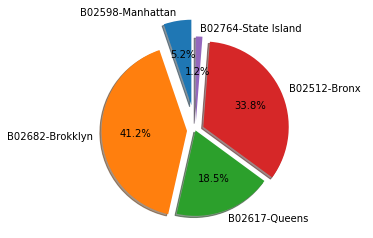

###################
Predicted DATA  - 0.84
###################


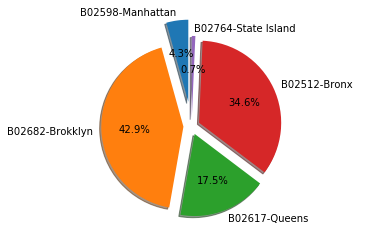

In [50]:
################################################
  ########### Visulaizing Results ###########
###############################################
one =[];two=[];three=[];four=[];five=[]
one2 =[];two2=[];three2=[];four2=[];five2=[]
da = Y_test
for i in range(0,len(da),1):
    if da[i] == 1:
        one.append(da[i])
    elif da[i] == 2:
        two.append(da[i])
    elif da[i] == 3:
        three.append(da[i])
    elif da[i] == 4:
        four.append(da[i])
    elif da[i] == 5:
        five.append(da[i])
        
# labels = ["ones","twos","threes","fours","fives"]
labels = ["B02598-Manhattan" ,"B02682-Brokklyn","B02617-Queens","B02512-Bronx","B02764-State Island"]

sizes = [len(one),len(two),len(three),len(four),len(five)]
lode = (0.3, 0.1, 0, 0.1,0.1)  # only "explode" the 2nd slice.
fig1, ax1 = plt.subplots()

print "###################"
print "TEST DATA"
print "###################"
print "\t\t\t NewYork City"

ax1.pie(sizes, explode=lode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
for j in range(0,len(temp),1):
    if temp[j] == 1:
        one2.append(temp[j])
    elif temp[j] == 2:
        two2.append(temp[j])
    elif temp[j] == 3:
        three2.append(temp[j])
    elif temp[j] == 4:
        four2.append(temp[j])
    elif temp[j] == 5:
        five2.append(temp[j])
        

# labels = ["B02598" ,"B02682","B02617","B02512","B02764"]
sizes = [len(one2),len(two2),len(three2),len(four2),len(five2)]
lode = (0.3, 0.1, 0.1, 0.1,0.1)  # only "explode" the 2nd slice.
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=lode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
print "###################"
print "Predicted DATA  -" , "0.84"
print "###################"
plt.show()
